In [1]:
from ase.io import read
import ase
from abtem import orthogonalize_cell
from abtem import show_atoms
import matplotlib.pyplot as plt
import numpy as np
import helper_functions as hf

In [2]:
atoms = read('gra_3.15deg_bilayer_relaxed.cif')
atoms = orthogonalize_cell(atoms)*(2,2,1)
atoms = ase.build.cut(atoms, (80/atoms.cell[0,0],0, 0), (0,80/atoms.cell[1,1],0), (0,0,1))

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='x [Å]', ylabel='y [Å]'>)

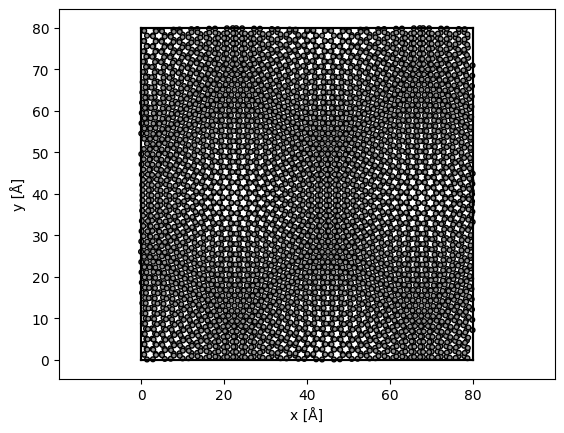

In [3]:
show_atoms(atoms)
#plt.plot(22, 39,'ro');

In [4]:
np.mean(atoms.positions[:,2])

12.551624905979617

In [5]:
first_layer_z = np.zeros((80,80))
second_layer_z = np.zeros((80,80))

first_layer = [atoms[i] for i in range(len(atoms)) if atoms[i].position[2]<12.55]
second_layer = [atoms[i] for i in range(len(atoms)) if atoms[i].position[2]>12.55]

positions = atoms.get_positions

for i in range(80):
    for j in range(80):
        first_distances = np.array([hf.cart2pol(*first_layer[k].position[:2], (i,j))[0] for k in range(len(first_layer))])
        min_idx = np.argmin(first_distances)
        first_layer_z[i,j] = first_layer[min_idx].position[2]
        
        second_distances = np.array([hf.cart2pol(*second_layer[k].position[:2], (i,j))[0] for k in range(len(second_layer))])
        min_idx = np.argmin(second_distances)
        second_layer_z[i,j] = second_layer[min_idx].position[2]

In [6]:
scale = 8/second_layer_z.shape[0]

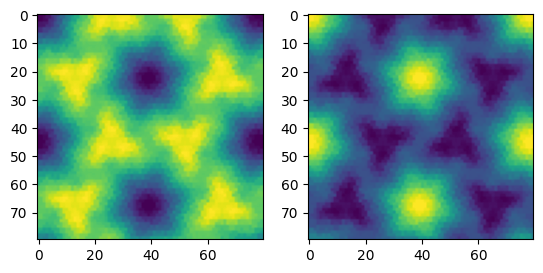

In [9]:
fig, axs = plt.subplots(1,2)
axs[0].imshow(first_layer_z)
axs[1].imshow(second_layer_z)

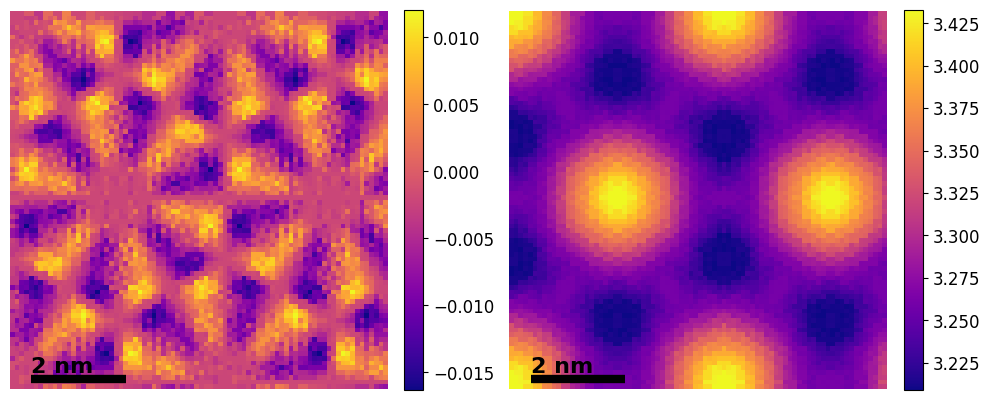

In [13]:
import helper_functions as hf
fig, axs = hf.make_scalebar(second_layer_z, scale,  (1,2,(1,2)), unit='nm')
a1= axs[0].imshow(((second_layer_z+first_layer_z)/2 - np.mean(atoms.positions[:,2])).transpose(), cmap='plasma')

a2 = axs[1].imshow((second_layer_z - first_layer_z).transpose(), cmap='plasma')
cbar = plt.colorbar(a1, fraction=0.046, pad=0.04)
cbar.ax.tick_params(labelsize=12)
cbar = plt.colorbar(a2, fraction=0.046, pad=0.04)
cbar.ax.tick_params(labelsize=12)
plt.tight_layout()

plt.savefig('comparison.pdf')

In [14]:
np.mean((second_layer_z - first_layer_z))

3.285328506765625

In [15]:
np.max((second_layer_z - first_layer_z))

3.433041219999998

In [16]:
np.min((second_layer_z - first_layer_z))

3.20890715